In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv('hotel_cleaned_data_set1.csv')
df.head()
df.shape

(118981, 30)

In [137]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays,guests,kids
count,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000,118981.000000
mean,0.370731,104.073751,2016.156395,27.164236,15.797094,0.031543,0.054437,0.030349,0.218514,0.031039,101.966892,0.062657,0.570629,3.425976,1.971063,0.108387
std,0.483003,106.891350,0.707723,13.598967,8.781118,0.174780,0.226879,0.171548,0.638077,0.173423,48.052048,0.245550,0.792402,2.541654,0.719452,0.404487
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.500000,0.000000,0.000000,2.000000,2.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,3.000000,2.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.000000,2.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,1.000000,1.000000,1.000000,18.000000,1.000000,510.000000,8.000000,5.000000,69.000000,55.000000,10.000000


### Feature Encoding

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118981 non-null  object 
 1   is_canceled                     118981 non-null  int64  
 2   lead_time                       118981 non-null  int64  
 3   arrival_date_year               118981 non-null  int64  
 4   arrival_date_month              118981 non-null  object 
 5   arrival_date_week_number        118981 non-null  int64  
 6   arrival_date_day_of_month       118981 non-null  int64  
 7   meal                            118981 non-null  object 
 8   country                         118981 non-null  object 
 9   market_segment                  118981 non-null  object 
 10  distribution_channel            118981 non-null  object 
 11  is_repeated_guest               118981 non-null  int64  
 12  previous_cancell

In [98]:
cat_feature = [feature for feature in df.columns if df[feature].dtype == 'object']
print("Number of Categorical Features are : ",len(cat_feature))

Number of Categorical Features are :  14


In [99]:
for feature in cat_feature:
    print("{} : {} labels ".format(feature,len(df[feature].unique())))

hotel : 2 labels 
arrival_date_month : 12 labels 
meal : 4 labels 
country : 178 labels 
market_segment : 7 labels 
distribution_channel : 5 labels 
reserved_room_type : 9 labels 
assigned_room_type : 11 labels 
deposit_type : 3 labels 
agent : 334 labels 
company : 349 labels 
customer_type : 4 labels 
reservation_status : 3 labels 
reservation_status_date : 926 labels 


The agent and company IDs recorded in the agent and company features include a large amount of categorical data that is de-identified and therefore difficult to interpret. Since information about the type of agent and company used is included in the market_segment and distribution_channel features, the agent and company features were not included in the model.

In [100]:
selected_cols = ['agent', 'company']
selected_rows = df[~df['agent'].isin(['No Agent']) & ~df['company'].isin(['No Company','281.0','324.0'])].head(10).loc[:, selected_cols]

# print the selected rows in table format with headers
display(selected_rows)

,agent,company
2391,240.0,113.0
5694,405.0,405.0
8756,223.0,223.0
12230,5.0,250.0
14083,196.0,61.0
14376,240.0,268.0
14391,240.0,331.0
16637,240.0,268.0
17500,184.0,146.0
18620,250.0,399.0


In [101]:
df=df.drop(columns=["agent","company"])


In [102]:
df[["reserved_room_type","assigned_room_type"]].head()

,reserved_room_type,assigned_room_type
0,C,C
1,C,C
2,A,C
3,A,A
4,A,A


In [103]:
df=df.drop(columns=["reserved_room_type","assigned_room_type"])


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118981 non-null  object 
 1   is_canceled                     118981 non-null  int64  
 2   lead_time                       118981 non-null  int64  
 3   arrival_date_year               118981 non-null  int64  
 4   arrival_date_month              118981 non-null  object 
 5   arrival_date_week_number        118981 non-null  int64  
 6   arrival_date_day_of_month       118981 non-null  int64  
 7   meal                            118981 non-null  object 
 8   country                         118981 non-null  object 
 9   market_segment                  118981 non-null  object 
 10  distribution_channel            118981 non-null  object 
 11  is_repeated_guest               118981 non-null  int64  
 12  previous_cancell

In [105]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [106]:
df=df.drop(columns=["arrival_date_year"])


In [107]:
df['reservation_status_date'].head()

0    2015-07-01
1    2015-07-01
2    2015-07-02
3    2015-07-02
4    2015-07-03
Name: reservation_status_date, dtype: object

In [108]:
df=df.drop(columns=["reservation_status_date"])


In [111]:
df=df.drop(columns=["country"])


KeyError: "['country'] not found in axis"

In [112]:
df=df.drop(columns=["arrival_date_week_number"])


KeyError: "['arrival_date_week_number'] not found in axis"

In [113]:
# #Applying label encoding for categorical features to find the correlation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1=df.copy()
df1['hotel'] = le.fit_transform(df1['hotel'])
df1['arrival_date_month'] = le.fit_transform(df1['arrival_date_month'])
df1['meal'] = le.fit_transform(df1['meal'])
df1['market_segment'] = le.fit_transform(df1['market_segment'])
df1['distribution_channel'] = le.fit_transform(df1['distribution_channel'])
df1['deposit_type'] = le.fit_transform(df1['deposit_type'])
df1['customer_type'] = le.fit_transform(df1['customer_type'])
df1['reservation_status'] = le.fit_transform(df1['reservation_status'])


In [114]:
cor=df1.corr()

<AxesSubplot:>

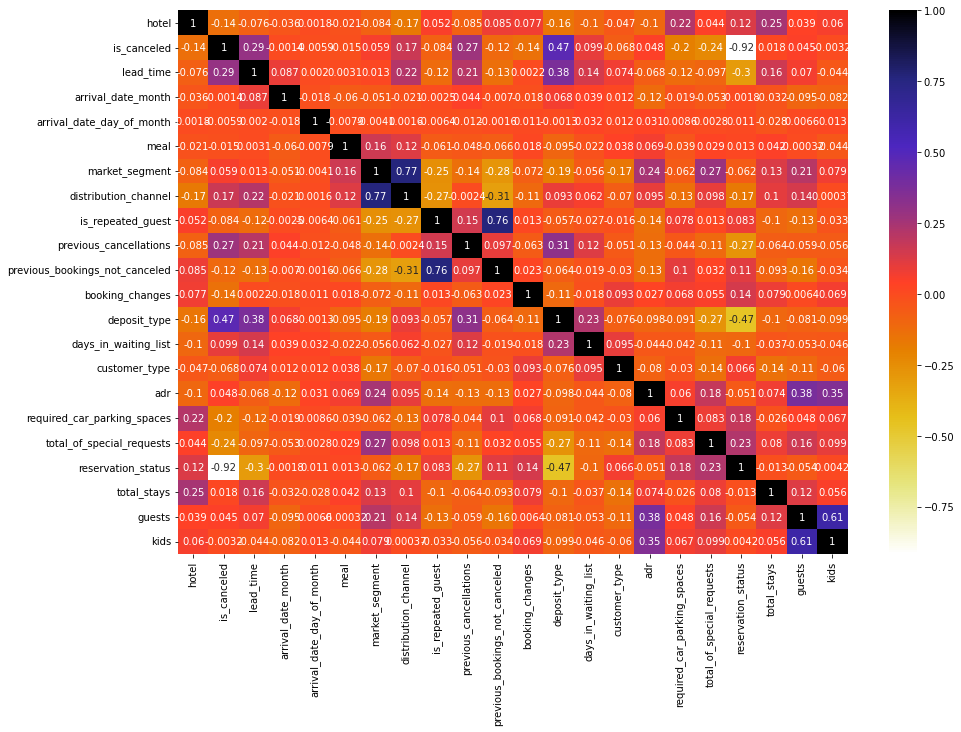

In [115]:
plt.figure(figsize = (15,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)

In [116]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [118]:
corr_features = correlation(df1, 0.75)
corr_features

{'distribution_channel',
 'previous_bookings_not_canceled',
 'reservation_status'}

We will remove those co related features, and some other attributes 

In [119]:
df = df.drop(columns = ['reservation_status','distribution_channel','previous_bookings_not_canceled'], axis=1)
df1 = df1.drop(columns = ['reservation_status','distribution_channel','previous_bookings_not_canceled'], axis=1)


In [120]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118981 non-null  int64  
 1   is_canceled                  118981 non-null  int64  
 2   lead_time                    118981 non-null  int64  
 3   arrival_date_month           118981 non-null  int64  
 4   arrival_date_day_of_month    118981 non-null  int64  
 5   meal                         118981 non-null  int64  
 6   market_segment               118981 non-null  int64  
 7   is_repeated_guest            118981 non-null  int64  
 8   previous_cancellations       118981 non-null  int64  
 9   booking_changes              118981 non-null  int64  
 10  deposit_type                 118981 non-null  int64  
 11  days_in_waiting_list         118981 non-null  int64  
 12  customer_type                118981 non-null  int64  
 13 

### Applying Feature Selection to get the top 12 important features from the Random Forest Model


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
X = df1.drop(['is_canceled'], axis = 1)
y = df1['is_canceled']


feature_names = X.columns.tolist()

# Train a random forest classifier on the dataset
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


# Get the feature importances
importances = rf.feature_importances_

# Sort the feature importances in ascending order
indices = np.argsort(importances)
indices_descending = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices_descending[f]]} ")




Feature ranking:
1. lead_time 
2. deposit_type 
3. adr 
4. arrival_date_day_of_month 
5. total_of_special_requests 
6. total_stays 
7. market_segment 
8. arrival_date_month 
9. previous_cancellations 
10. customer_type 
11. required_car_parking_spaces 
12. booking_changes 
13. guests 
14. meal 
15. hotel 
16. kids 
17. is_repeated_guest 
18. days_in_waiting_list 


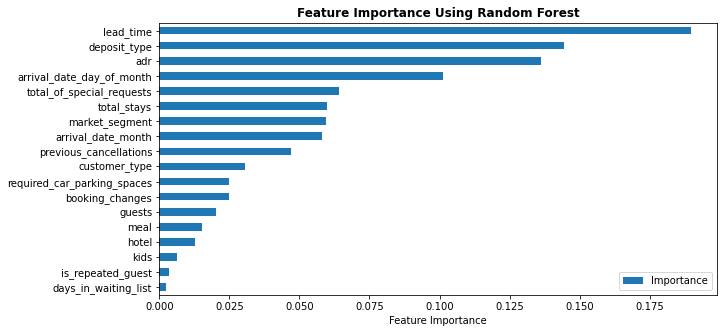

In [122]:
plt.figure(figsize =(10,5))
feature_imp = pd.Series(importances[indices], index=X.columns[indices])
feature_imp.plot(kind='barh', label='Importance')
plt.legend()
plt.title('Feature Importance Using Random Forest', weight='bold')
plt.xlabel('Feature Importance')
plt.show()

In [123]:
# Print the feature ranking
print("Feature ranking:")
for f in range(12):
    print(f"{f + 1}. {X.columns[indices_descending[f]]} ")


Feature ranking:
1. lead_time 
2. deposit_type 
3. adr 
4. arrival_date_day_of_month 
5. total_of_special_requests 
6. total_stays 
7. market_segment 
8. arrival_date_month 
9. previous_cancellations 
10. customer_type 
11. required_car_parking_spaces 
12. booking_changes 


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 19 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   hotel                        118981 non-null  object 
 1   is_canceled                  118981 non-null  int64  
 2   lead_time                    118981 non-null  int64  
 3   arrival_date_month           118981 non-null  object 
 4   arrival_date_day_of_month    118981 non-null  int64  
 5   meal                         118981 non-null  object 
 6   market_segment               118981 non-null  object 
 7   is_repeated_guest            118981 non-null  int64  
 8   previous_cancellations       118981 non-null  int64  
 9   booking_changes              118981 non-null  int64  
 10  deposit_type                 118981 non-null  object 
 11  days_in_waiting_list         118981 non-null  int64  
 12  customer_type                118981 non-null  object 
 13 

In [125]:
df= df.drop(['meal','kids','is_repeated_guest','days_in_waiting_list','guests','hotel'],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118981 entries, 0 to 118980
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   is_canceled                  118981 non-null  int64  
 1   lead_time                    118981 non-null  int64  
 2   arrival_date_month           118981 non-null  object 
 3   arrival_date_day_of_month    118981 non-null  int64  
 4   market_segment               118981 non-null  object 
 5   previous_cancellations       118981 non-null  int64  
 6   booking_changes              118981 non-null  int64  
 7   deposit_type                 118981 non-null  object 
 8   customer_type                118981 non-null  object 
 9   adr                          118981 non-null  float64
 10  required_car_parking_spaces  118981 non-null  int64  
 11  total_of_special_requests    118981 non-null  int64  
 12  total_stays                  118981 non-null  int64  
dtyp

In [126]:
dummies = pd.get_dummies(df.arrival_date_month,prefix='arrival_date_month')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('arrival_date_month',axis='columns')

In [127]:
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,market_segment,previous_cancellations,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,342,1,Direct,0,3,No Deposit,Transient,0.0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,737,1,Direct,0,4,No Deposit,Transient,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,7,1,Direct,0,0,No Deposit,Transient,75.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,13,1,Corporate,0,0,No Deposit,Transient,75.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,14,1,Online TA,0,0,No Deposit,Transient,98.0,0,...,0,0,0,1,0,0,0,0,0,0


In [128]:
dummies = pd.get_dummies(df.market_segment,prefix='market_segment')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('market_segment',axis='columns')

In [129]:
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,previous_cancellations,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,...,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA
0,0,342,1,0,3,No Deposit,Transient,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,737,1,0,4,No Deposit,Transient,0.0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,7,1,0,0,No Deposit,Transient,75.0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,13,1,0,0,No Deposit,Transient,75.0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,14,1,0,0,No Deposit,Transient,98.0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [130]:
dummies = pd.get_dummies(df.deposit_type,prefix='deposit_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('deposit_type',axis='columns')

In [131]:
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,previous_cancellations,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_stays,...,market_segment_Aviation,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable
0,0,342,1,0,3,Transient,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,737,1,0,4,Transient,0.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,0,7,1,0,0,Transient,75.0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
3,0,13,1,0,0,Transient,75.0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,14,1,0,0,Transient,98.0,0,1,2,...,0,0,0,0,0,0,1,1,0,0


In [132]:
dummies = pd.get_dummies(df.customer_type,prefix='customer_type')
df = pd.concat([df,dummies],axis='columns')
df = df.drop('customer_type',axis='columns')

In [133]:
df.head()

,is_canceled,lead_time,arrival_date_day_of_month,previous_cancellations,booking_changes,adr,required_car_parking_spaces,total_of_special_requests,total_stays,arrival_date_month_April,...,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,0,342,1,0,3,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,737,1,0,4,0.0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,7,1,0,0,75.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,13,1,0,0,75.0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
4,0,14,1,0,0,98.0,0,1,2,0,...,0,0,1,1,0,0,0,0,1,0


In [134]:
df.to_csv('hotel_cleaned_data_set_final_for_model1.csv' ,index= False)
